# Distorzija i thrasholdi

Sadrzaj sveske je fokusiran na ispravljanje distorzije slike, kao i za pronalazenje adekvatnih thrasholdova za gradijete, color palete...

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline

Distorted Chess Board Images


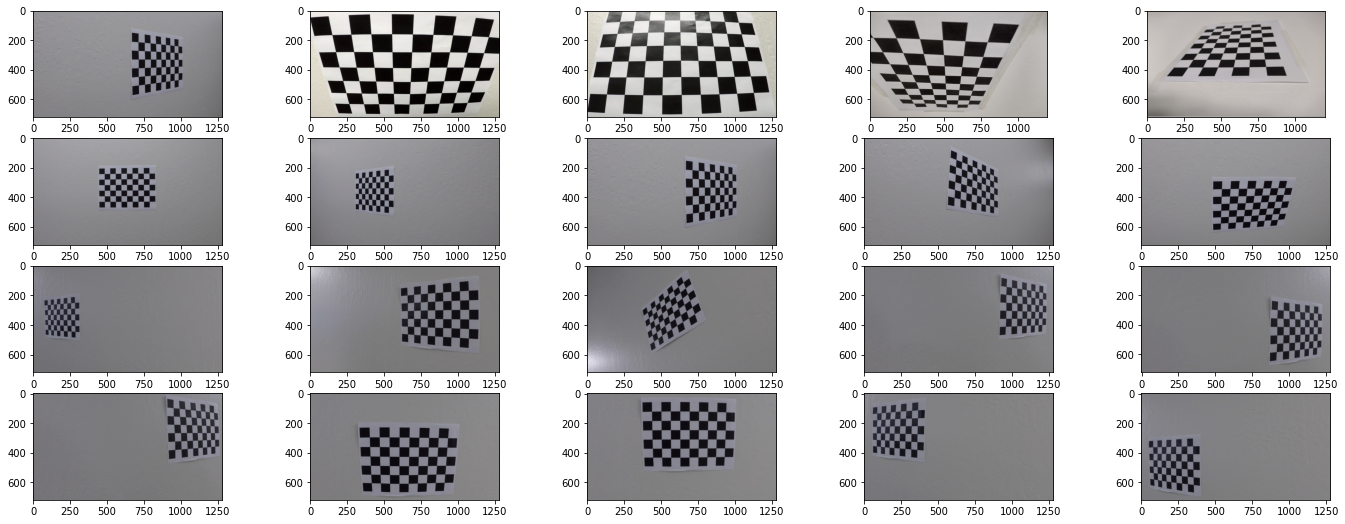

In [2]:
fig,axes= plt.subplots(4,5, figsize=(24,9))
row=0
col=0
distorted=[]
print("Distorted Chess Board Images")
for i in range(20):
    image= mpimg.imread("Calibration/calibration"+str(i+1)+".jpg")
    distorted.append(image)
    axes[row,col].imshow(image)
    col+=1
    if(col==5):
        col=0
        row+=1
    

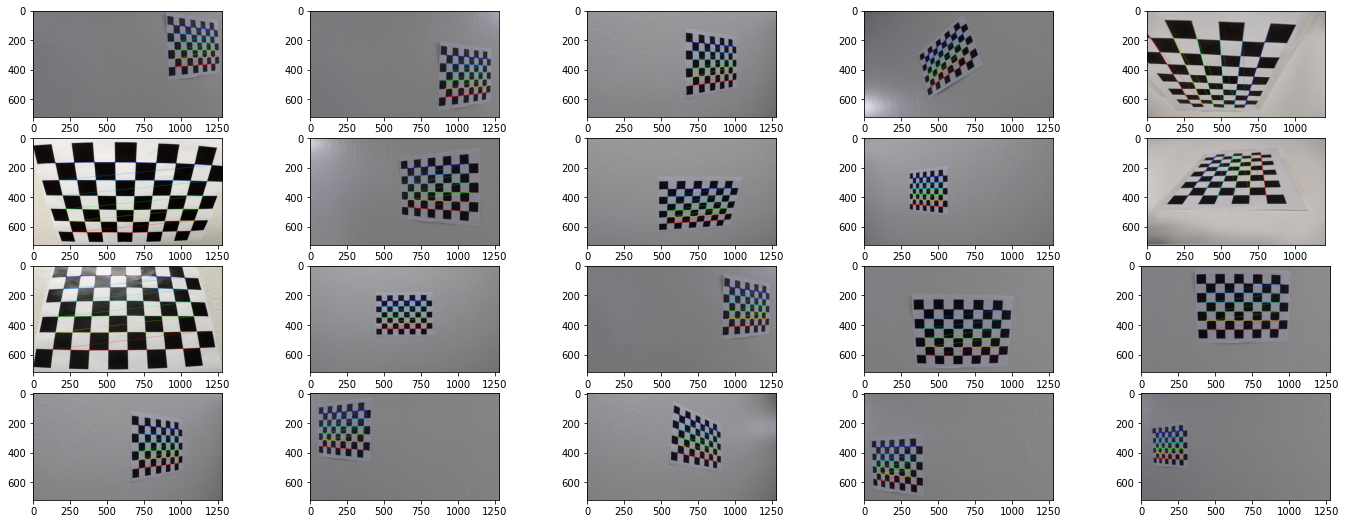

In [3]:
fig,axes= plt.subplots(4,5, figsize=(24,9))
row = 0
col = 0
#3D tačke sveta
objpoints = []
# 2D tačke slike
imgpoints = [] 
#šahovka tabla dimenzija
CBS = (9,6) 
# kreiranje elemenata za mapiranje
objp = np.zeros((CBS[1]*CBS[0],3), dtype="float32") 
objp[:,:2] = np.mgrid[0:CBS[0],0:CBS[1]].T.reshape(-1,2)

# ucitavanje slika 
for name in glob.glob("Calibration/calibration*.jpg"):
    image = mpimg.imread(name)
    # grayscale mode
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # pronalazenje korneras
    ret, corners = cv2.findChessboardCorners(gray, CBS, None)
    
    if ret:
        # pohranjivanje podataka
        imgpoints.append(corners)
        objpoints.append(objp)
        
        
        # iscrtavanje linija
        img = cv2.drawChessboardCorners(image,(9,6),corners,ret) 
        axes[row,col].imshow(img)
        col+=1
    if col ==5:
        row +=1
        col =0

In [4]:
def undistort(img, objpoints, imgpoints):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1], None, None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst

    
    return dst

Text(0.5, 1.0, 'Undistorted image')

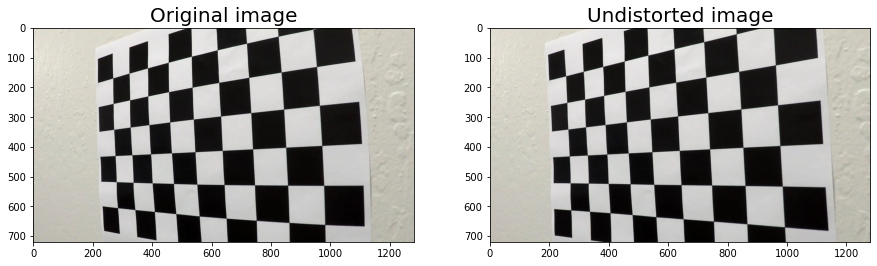

In [5]:
im = mpimg.imread("Calibration/adadasdasd.jpg")
di = undistort(im,objpoints,imgpoints)

fig , (ax1, ax2) = plt.subplots(1,2,figsize=(15,10))
ax1.imshow(im)
ax1.set_title("Original image", fontsize = 20)
ax2.imshow(di)
ax2.set_title("Undistorted image", fontsize = 20)

Text(0.5, 1.0, 'Undistorted')

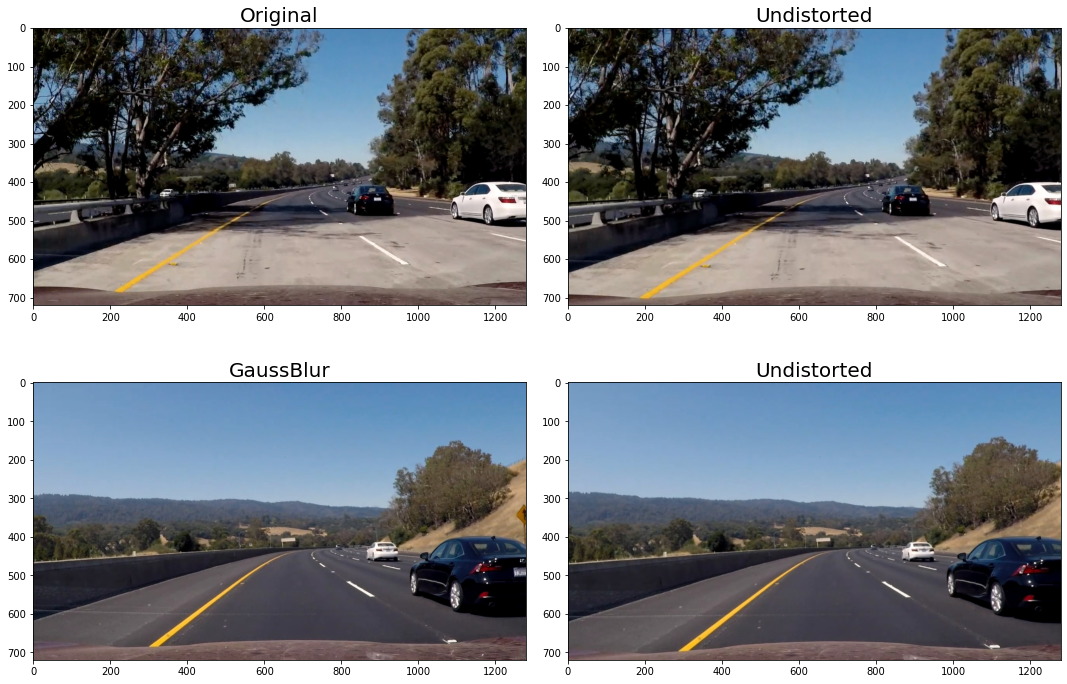

In [6]:
fig, axs = plt.subplots(2, 2, figsize= (15,10))
fig.tight_layout()
img1 = mpimg.imread("TestImage/image2.jpg")
di1 = undistort(img1,objpoints,imgpoints)
img2 = mpimg.imread("TestImage/image5.jpg")
di2 = undistort(img2,objpoints,imgpoints)


axs[0, 0].imshow(img1)
axs[0, 0].set_title("Original", fontsize=20)
axs[0, 1].imshow(di1, cmap = "gray")
axs[0, 1].set_title('Undistorted',fontsize=20)
axs[1, 0].imshow(img2)
axs[1, 0].set_title('GaussBlur',fontsize=20)
axs[1, 1].imshow(di2, cmap ="gray")
axs[1, 1].set_title('Undistorted',fontsize=20)
    
    
    


# Eksploracija thrasholdova

In [7]:
def sobel_abs_thresh(img, orient = "x", thresh=(145,255)):
    
    
    # grayscal sllike
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # kalakulacija sovela
    if orient == "x":
        sobel = cv2.Sobel(gray_img, cv2.CV_64F, 1,0)
    elif orient =="y":
        sobel = cv2.Sobel(gray_img, cv2.CV_64F, 0,1)
    else: 
        print("Wrong orientation")
        
    # Apsolutna vrednost
    sobel_abs = np.abs(sobel)
    
    #skaliranje
    sobel_scal = np.array(255 * sobel_abs / np.max(sobel_abs), dtype = "uint8") 
    # primena trasholda
    
    output = np.zeros_like(sobel_scal)
    output[(sobel_scal >= thresh[0]) & (sobel_scal <= thresh[1])] = 1
    
    return output

def magnitude_thresh(img, sobel_kernel=3, thresh_m=(0, 255)):
    
    #grayscal slike
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # računjanje gradijenata (sobela)
    sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0, ksize = sobel_kernel)
    sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize = sobel_kernel)
    # računjanje magnitude
    sobel_magnitude = np.sqrt(sobelx**2 + sobely**2)
    #skliranje dobela
    convert = np.array(255*sobel_magnitude/np.max(sobel_magnitude),dtype = "uint8")
    # kreirenje naske
    output = np.zeros_like(sobel_magnitude)
    output[(convert >= thresh_m[0]) & (convert <= thresh_m[1])]= 1
    return output



def GraDir_thres(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    
    #grayscal slike
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # računjanje gradijenata (sobela)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1,0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0,1,ksize=sobel_kernel)
    # apsolutna vrednost
    abs_sobelx = np.abs(sobelx)
    abs_sobely = np.abs(sobely)
    # računjanje gradijenata ojentacije
    gradDirec = np.arctan2(abs_sobely, abs_sobelx)
    # maska
    output = np.zeros_like(sobelx, dtype ="uint8")
    output[(gradDirec >= thresh[0]) & (gradDirec <= thresh[1])] = 1 
    
    return output

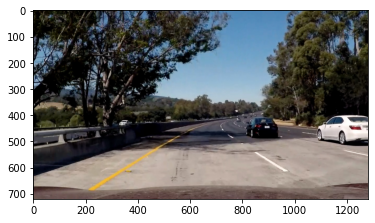

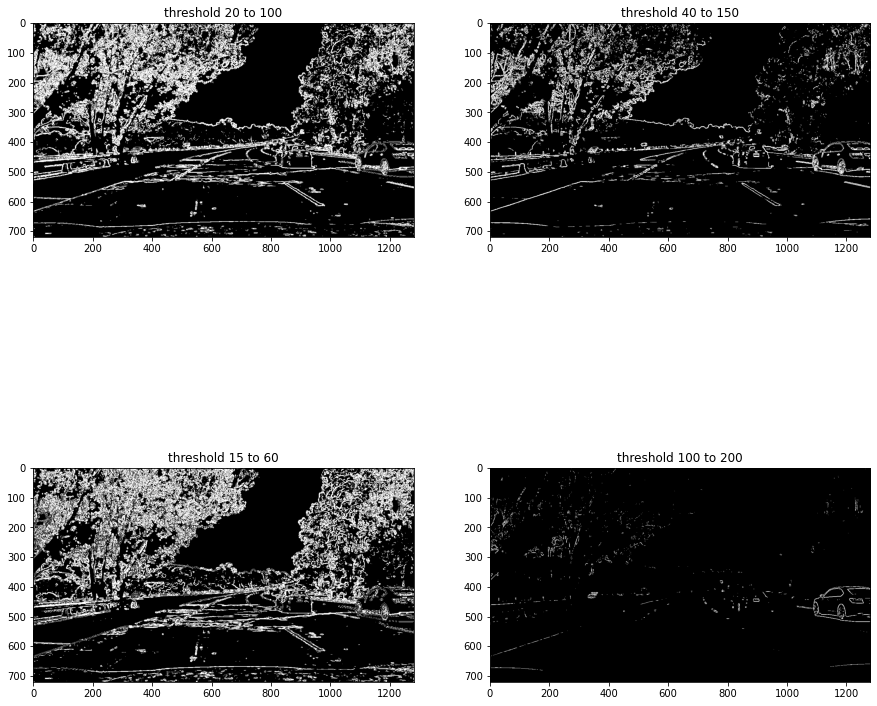

In [8]:
thresh= [(20,100),(40,150),(15,60),(100,200)]

plt.imshow(img1)

f,axes= plt.subplots(2,2, figsize=(15,15))

row=0
col =0

for elem in thresh:
    
    
    
    #sobel_image1= sobel_abs_thresh(img1, 'x', (elem[0], elem[1]))
    #axes[row,col].imshow(sobel_image1,cmap='gray')
    #axes[row,col].set_title('threshold '+str(elem[0])+' to '+str(elem[1]))
    
    
    mag = magnitude_thresh(img1, 3,(elem[0], elem[1]))
    axes[row,col].imshow(mag,cmap='gray')
    axes[row,col].set_title('threshold '+str(elem[0])+' to '+str(elem[1]))
    
    col +=1
    if col ==2:
        col =0
        row+=1
    

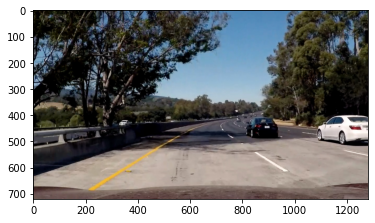

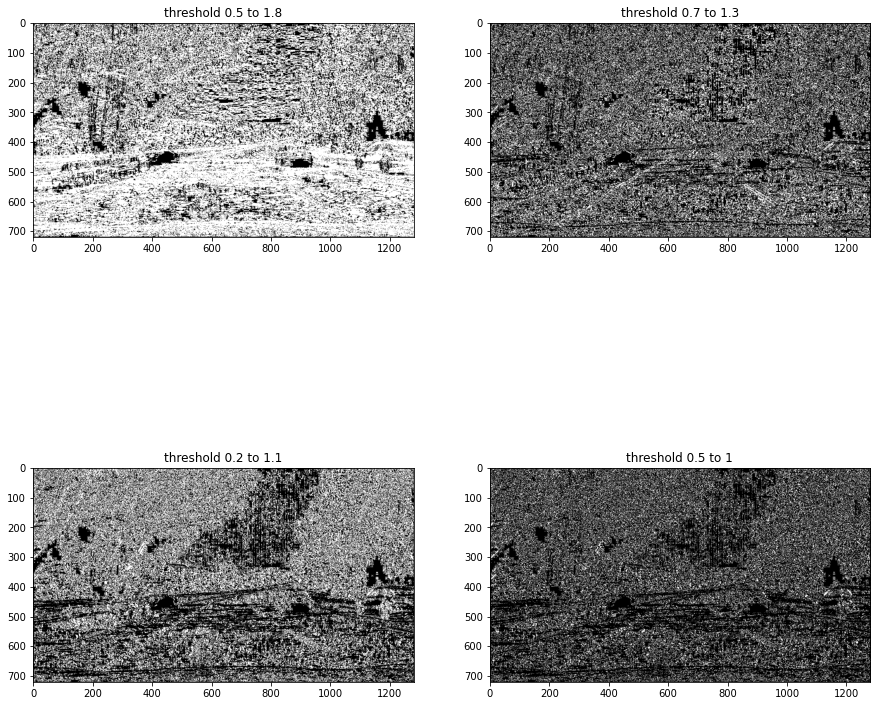

In [9]:
thresh_grad = [(0.5,1.8),(0.7,1.3),(0.2,1.1), (0.5,1)]
plt.imshow(img1)

f,axes= plt.subplots(2,2, figsize=(15,15))

row=0
col =0

for elem in thresh_grad:
    
    grad = GraDir_thres(img1, 3,(elem[0], elem[1]))
    axes[row,col].imshow(grad,cmap='gray')
    axes[row,col].set_title('threshold '+str(elem[0])+' to '+str(elem[1]))
    
    col +=1
    if col ==2:
        col =0
        row+=1

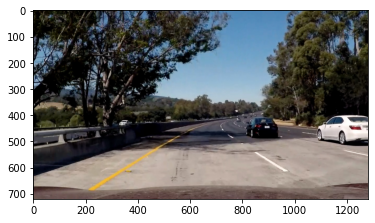

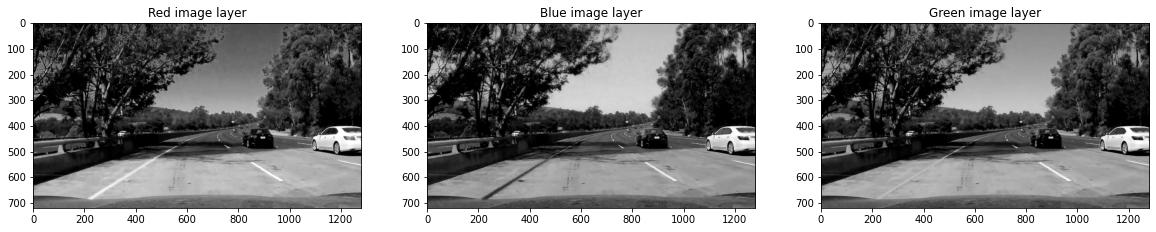

In [10]:
plt.imshow(img1)

R = img1[:,:,0]
G = img1[:,:,1]
B = img1[:,:,2]

# display color layers 

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,15))
ax1.set_title("Red image layer")
ax1.imshow(R,cmap ="gray" )
ax2.set_title("Blue image layer")
ax2.imshow(B,cmap="gray")
ax3.set_title("Green image layer")
ax3.imshow(G,cmap="gray")

In [11]:
def img_to_rgb(img, thrash=(200,255)):
    
    R = img[:,:,0]
    
    binarR = np.zeros_like(R)
    binarR[(R>= thrash[0]) & (R <= thrash[1])] = 1
    
    

    return binarR

def img_to_hls(img, thrash=(200,255)):
    
    hls_channel = cv2.cvtColor(img1,cv2.COLOR_RGB2HLS)
    S = hls_channel[:,:,2]
    
    binarS = np.zeros_like(S)
    
    binarS[(S>= thrash[0]) & (S <= thrash[1])] = 1
    
    

    return binarS


def img_to_hsv(img, thrash=(200,255)):
    
    hls_channel = cv2.cvtColor(img1,cv2.COLOR_RGB2HSV)
    V = hls_channel[:,:,2]
    
    binarV = np.zeros_like(V)
    
    binarV[(V>= thrash[0]) & (V <= thrash[1])] = 1
    
    

    return binarV


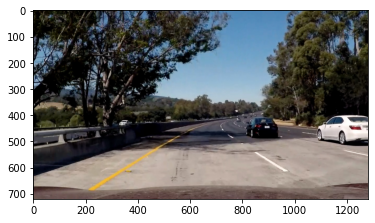

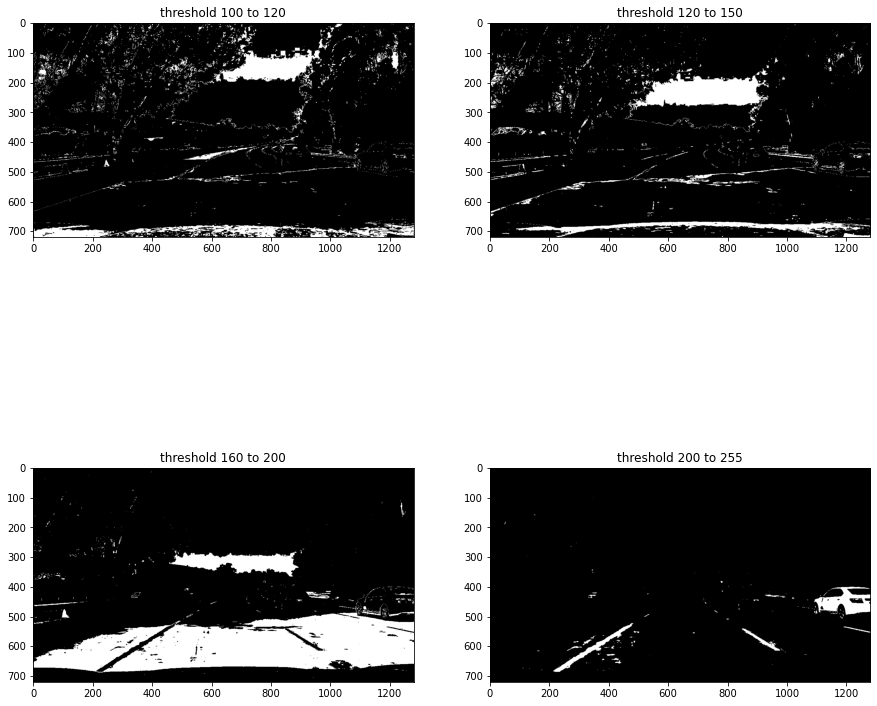

In [12]:
thresh_grad = [(100,120),(120,150),(160,200), (200,255)]
plt.imshow(img1)

f,axes= plt.subplots(2,2, figsize=(15,15))

row=0
col =0

for elem in thresh_grad:
    r = img_to_rgb(img1, thrash=elem)
    
    axes[row,col].imshow(r,cmap='gray')
    axes[row,col].set_title('threshold '+str(elem[0])+' to '+str(elem[1]))
    
    col +=1
    if col ==2:
        col =0
        row+=1



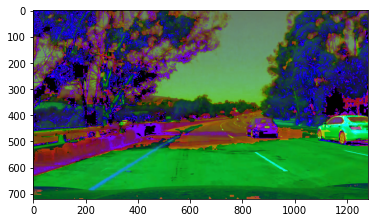

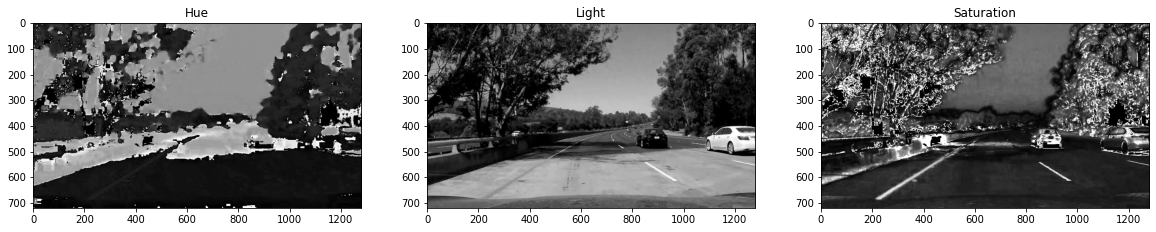

In [13]:
hls_channel = cv2.cvtColor(img1,cv2.COLOR_RGB2HLS)
plt.imshow(hls_channel)

H = hls_channel[:,:,0]
L = hls_channel[:,:,1]
S = hls_channel[:,:,2]

# display color layers 

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,15))
ax1.set_title("Hue")
ax1.imshow(H,cmap="gray")
ax2.set_title("Light")
ax2.imshow(L, cmap="gray")
ax3.set_title("Saturation")
ax3.imshow(S, cmap="gray")

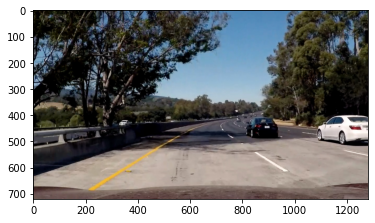

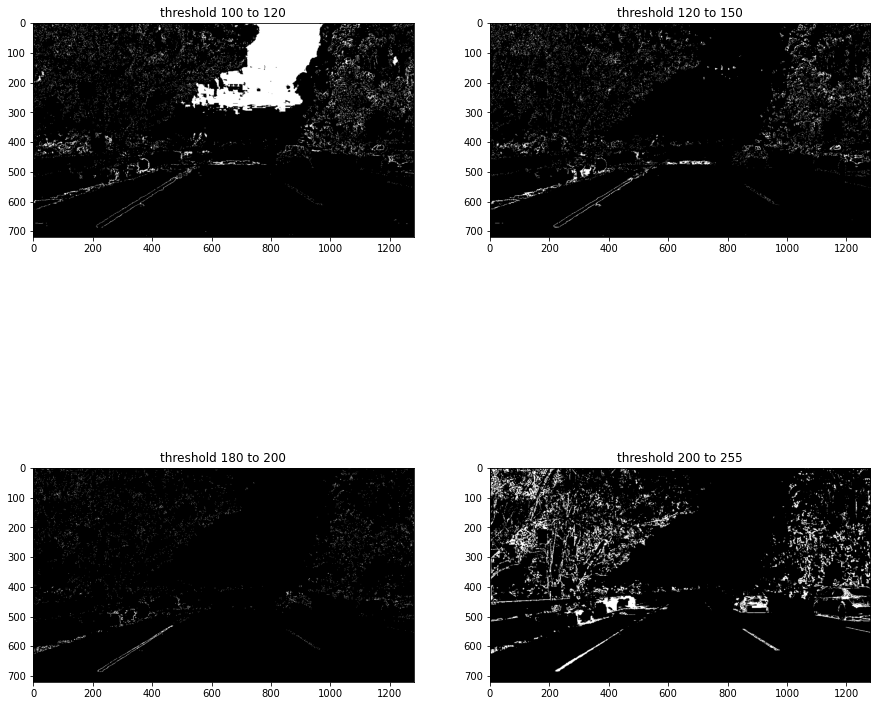

In [14]:
thresh_grad = [(100,120),(120,150),(180,200), (200,255)]
plt.imshow(img1)

f,axes= plt.subplots(2,2, figsize=(15,15))

row=0
col =0

for elem in thresh_grad:
    S= img_to_hls(img1, thrash=elem)
    
    axes[row,col].imshow(S,cmap='gray')
    axes[row,col].set_title('threshold '+str(elem[0])+' to '+str(elem[1]))
    
    col +=1
    if col ==2:
        col =0
        row+=1

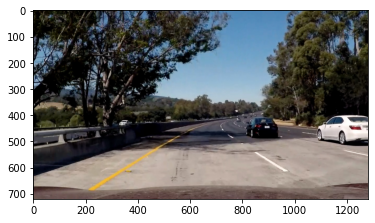

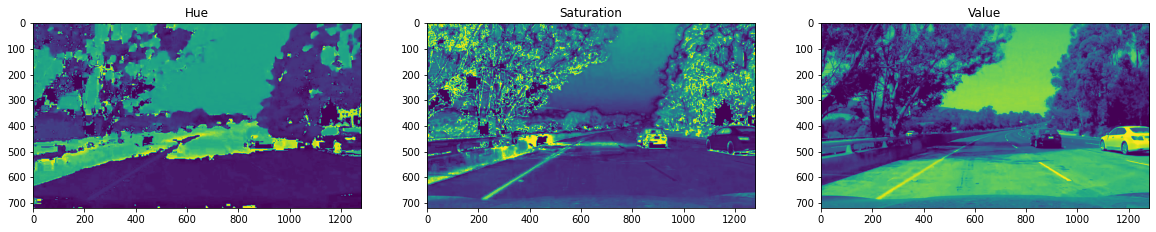

In [15]:
plt.imshow(img1)
hsv_channel = cv2.cvtColor(img1,cv2.COLOR_RGB2HSV)

H = hsv_channel[:,:,0]
S = hsv_channel[:,:,1]
V = hsv_channel[:,:,2]

# display color layers 

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,15))
ax1.set_title("Hue")
ax1.imshow(H)
ax2.set_title("Saturation")
ax2.imshow(S)
ax3.set_title("Value")
ax3.imshow(V)

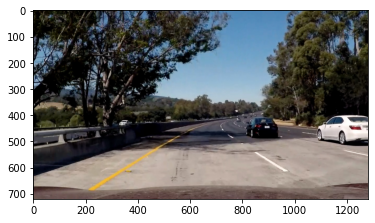

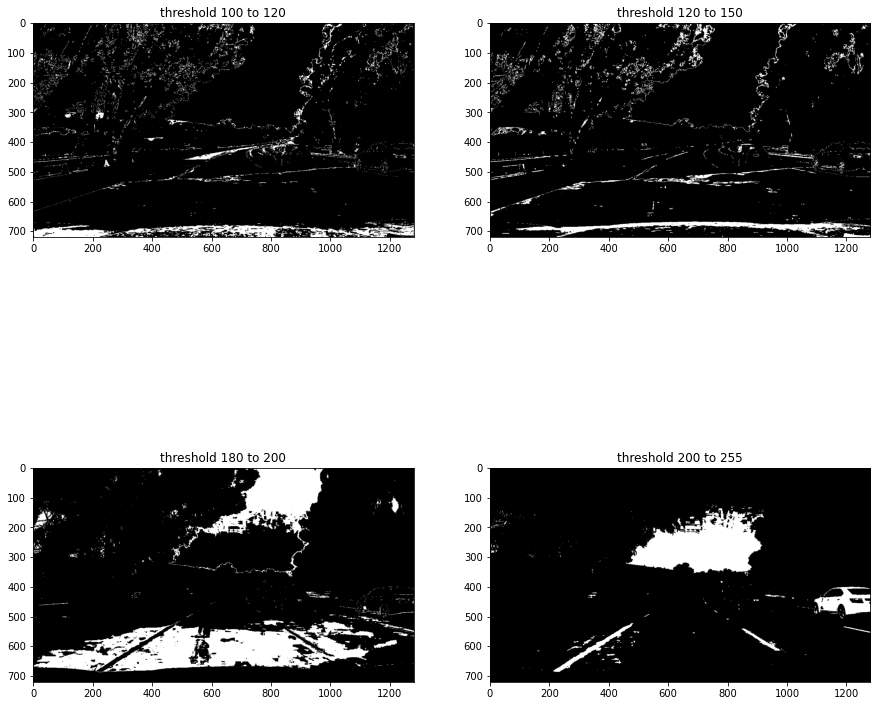

In [16]:
thresh_grad = [(100,120),(120,150),(180,200), (200,255)]
plt.imshow(img1)

f,axes= plt.subplots(2,2, figsize=(15,15))

row=0
col =0

for elem in thresh_grad:
    V= img_to_hsv(img1, thrash=elem)
    
    axes[row,col].imshow(V,cmap='gray')
    axes[row,col].set_title('threshold '+str(elem[0])+' to '+str(elem[1]))
    
    col +=1
    if col ==2:
        col =0
        row+=1